In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide 
from nixtla.utils import in_colab

In [ ]:
#| hide 
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# Add confidence levels

Tweak the confidence level used for historical anomaly detection. By default, if a value falls outside the 99% confidence interval, it is labeled as an anomaly.

Modify this with the `level` parameter, which accepts any value between 0 and 100, including decimals.

Increasing the `level` results in fewer anomalies detected, while decreasing the `level` increases the number of anomalies detected.


In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/capabilities/historical-anomaly-detection/04_confidence_levels')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/capabilities/anomaly-detection/04_confidence_levels.ipynb)

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

> 👍 Use an Azure AI endpoint
> 
> To use an Azure AI endpoint, set the `base_url` argument:
> 
> `nixtla_client = NixtlaClient(base_url="you azure ai endpoint", api_key="your api_key")`

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


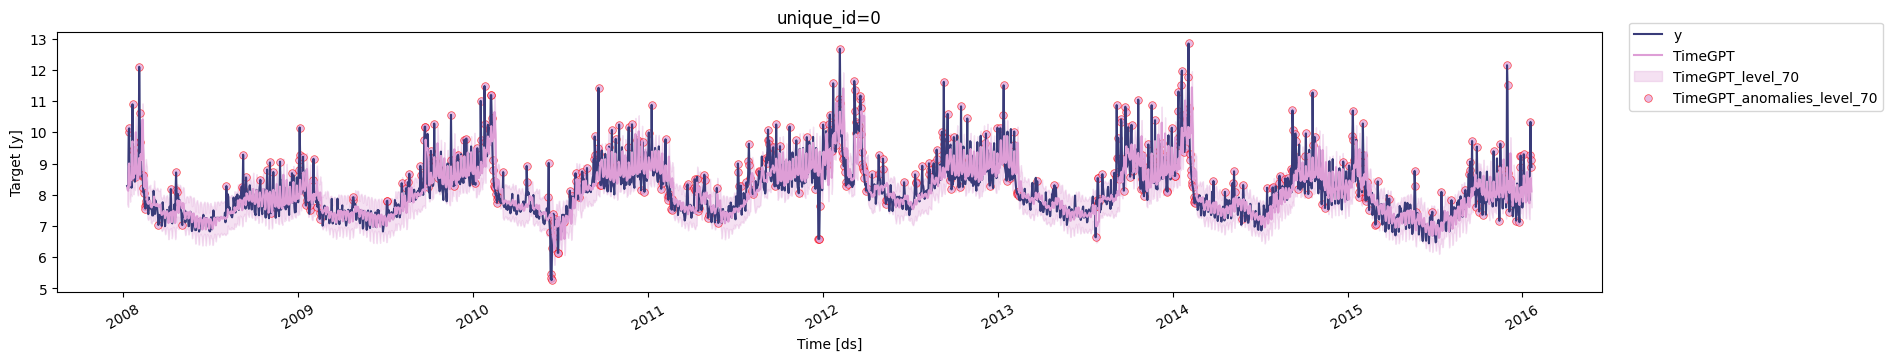

In [ ]:
# Read the data
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/peyton-manning.csv')

# Anomaly detection using a 70% confidence interval
anomalies_df = nixtla_client.detect_anomalies(
    df, 
    freq='D',
    level=70
)

# Plot anomalies
nixtla_client.plot(df, anomalies_df)

> 📘 Available models in Azure AI
>
> If you use an Azure AI endpoint, set `model="azureai"`
>
> `nixtla_client.detect_anomalies(..., model="azureai")`
>
> For the public API, two models are supported: `timegpt-1` and `timegpt-1-long-horizon`.
> 
> By default, `timegpt-1` is used. See [this tutorial](https://docs.nixtla.io/docs/tutorials-long_horizon_forecasting) for details on using `timegpt-1-long-horizon`.

For more information, read our detailed tutorial on [anomaly detection](https://docs.nixtla.io/docs/tutorials/anomaly_detection).